In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import yaml

In [51]:
# Load settings from config.yaml
with open("config.yaml", 'r') as file:
    config = yaml.safe_load(file)

### Combine all the predicted data

In [52]:
op_price_future_data_path = config['general']['data']['op_price_future_data_path']
avpi_future_data_path = config['general']['data']['avpi_future_data_path']
pr_future_data_path = config['general']['data']['pr_future_data_path']
lar_future_data_path = config['general']['data']['lar_future_data_path']
vs_future_data_path = config['general']['data']['vs_future_data_path']
cs_future_data_path = config['general']['data']['cs_future_data_path']

In [53]:
op_price_data = pd.read_csv(op_price_future_data_path, parse_dates=['Date'])
avpi_data = pd.read_csv(avpi_future_data_path, parse_dates=['Date'])
pr_data = pd.read_csv(pr_future_data_path, parse_dates=['Date'])
lar_data = pd.read_csv(lar_future_data_path, parse_dates=['Date'])
vs_data = pd.read_csv(vs_future_data_path, parse_dates=['Date'])
cs_data = pd.read_csv(cs_future_data_path, parse_dates=['Date'])

In [54]:
op_price_data.head()

,Date,Predicted_OP_Price
0,2024-12-01,2.417603
1,2024-12-02,2.501569
2,2024-12-03,2.515081
3,2024-12-04,2.625379
4,2024-12-05,2.875699


In [55]:
avpi_data.head()

,Date,Predicted_AVPI
0,2024-12-01,0.209245
1,2024-12-02,0.211726
2,2024-12-03,0.214864
3,2024-12-04,0.220739
4,2024-12-05,0.235863


In [56]:
pr_data.head()

,Date,PR
0,2024-12-01,0.077962
1,2024-12-02,0.077900
2,2024-12-03,0.077890
3,2024-12-04,0.077928
4,2024-12-05,0.078007


In [57]:
lar_data.head()

,Date,Predicted_LAR
0,2024-12-01,0.286226
1,2024-12-02,0.489623
2,2024-12-03,0.493114
3,2024-12-04,0.432235
4,2024-12-05,0.393247


In [58]:
vs_data.head()

,Date,Predicted_Votable_Supply
0,2024-12-01,1.047217e+08
1,2024-12-02,1.046375e+08
2,2024-12-03,1.046243e+08
3,2024-12-04,1.046750e+08
4,2024-12-05,1.047814e+08


In [59]:
cs_data.head()

,Date,Circulating Supply
0,2024-12-01,1.343236e+09
1,2024-12-02,1.343236e+09
2,2024-12-03,1.343236e+09
3,2024-12-04,1.343236e+09
4,2024-12-05,1.343236e+09


In [60]:
op_price_data.rename(columns={'Predicted_OP_Price' : 'OP_Price'}, inplace=True)
avpi_data.rename(columns={'Predicted_AVPI' : 'AVPI'}, inplace=True)
lar_data.rename(columns={'Predicted_LAR' : 'LAR'}, inplace=True)
vs_data.rename(columns={'Predicted_Votable_Supply' : 'Votable Supply'}, inplace=True)

In [61]:
print("OP_Price :")
print("Min -",round(op_price_data['OP_Price'].min(), 2),", Max -",round(op_price_data['OP_Price'].max(), 2))

print("\nAVPI :")
print("Min -",round(avpi_data['AVPI'].min(), 2),", Max -",round(avpi_data['AVPI'].max(), 2))

print("\nPR :")
print("Min -",round(pr_data['PR'].min(), 2),", Max -",round(pr_data['PR'].max(), 2))

print("\nLAR :")
print("Min -",round(lar_data['LAR'].min(), 2),", Max -",round(lar_data['LAR'].max(), 2))

OP_Price :
Min - 1.72 , Max - 5.2

AVPI :
Min - 0.21 , Max - 0.58

PR :
Min - 0.06 , Max - 0.08

LAR :
Min - 0.2 , Max - 0.49


In [62]:
# Merge datasets on the 'Date' column
merged_data = pd.merge(op_price_data, avpi_data, on="Date", how="left")
merged_data = pd.merge(merged_data, pr_data, on="Date", how="left")
merged_data = pd.merge(merged_data, lar_data, on="Date", how="left")
merged_data = pd.merge(merged_data, vs_data, on="Date", how="left")
merged_data = pd.merge(merged_data, cs_data, on="Date", how="left")

In [63]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                761 non-null    datetime64[ns]
 1   OP_Price            761 non-null    float64       
 2   AVPI                761 non-null    float64       
 3   PR                  761 non-null    float64       
 4   LAR                 761 non-null    float64       
 5   Votable Supply      761 non-null    float64       
 6   Circulating Supply  761 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 41.7 KB


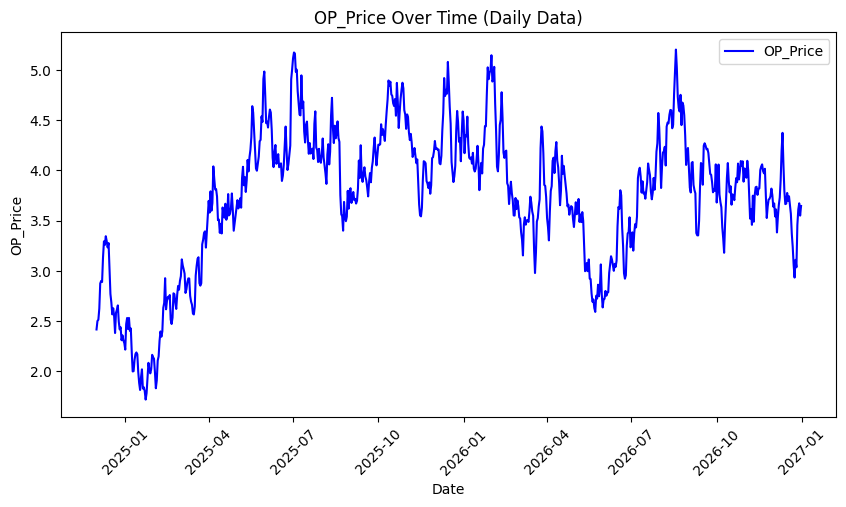

In [64]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data
ax.plot(merged_data['Date'], merged_data["OP_Price"], color='blue', label="OP_Price")
ax.plot()

# Labels and title
ax.set_xlabel("Date")
ax.set_ylabel("OP_Price")
ax.set_title("OP_Price Over Time (Daily Data)")
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

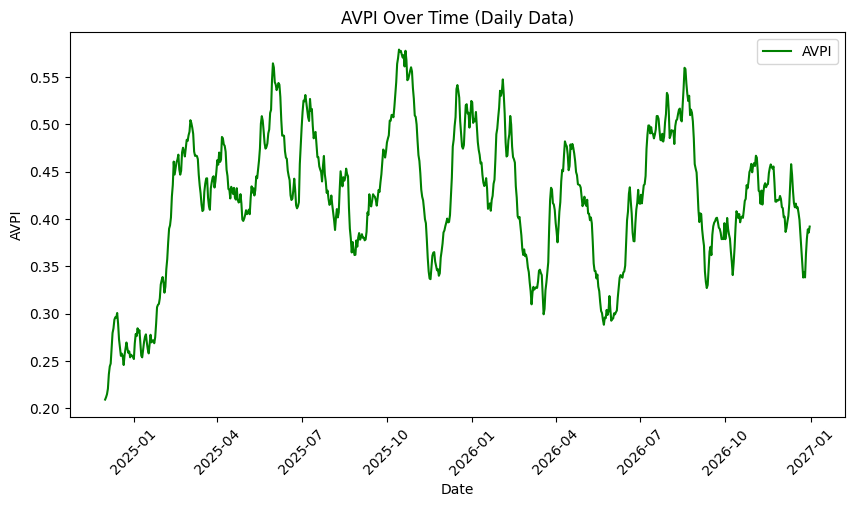

In [65]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data
ax.plot(merged_data['Date'], merged_data["AVPI"], color='green', label="AVPI")
ax.plot()

# Labels and title
ax.set_xlabel("Date")
ax.set_ylabel("AVPI")
ax.set_title("AVPI Over Time (Daily Data)")
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

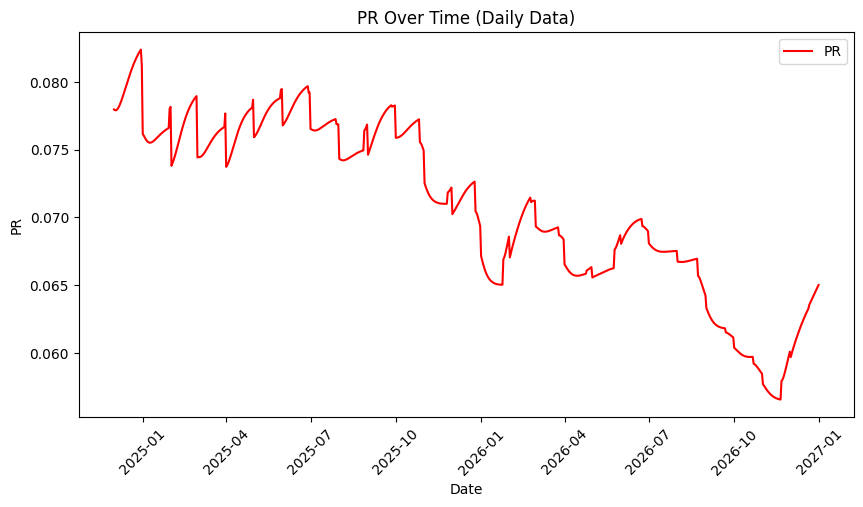

In [66]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data
ax.plot(merged_data['Date'], merged_data["PR"], color='red', label="PR")
ax.plot()

# Labels and title
ax.set_xlabel("Date")
ax.set_ylabel("PR")
ax.set_title("PR Over Time (Daily Data)")
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

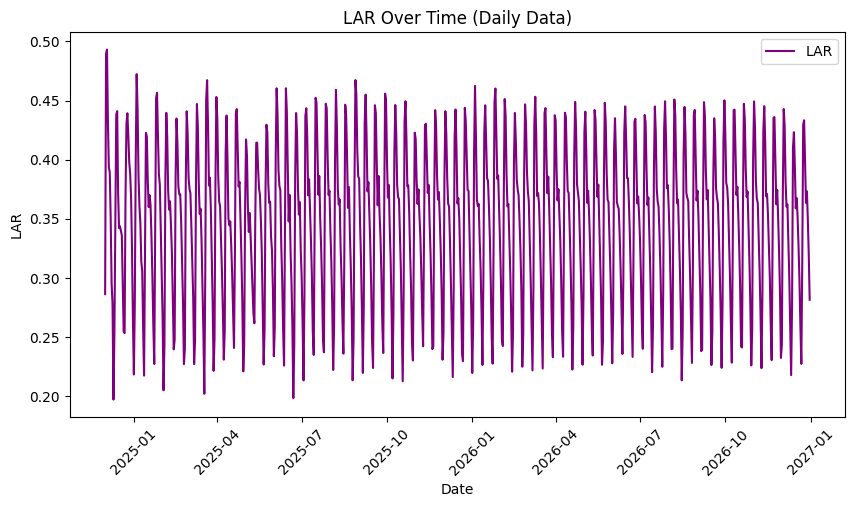

In [67]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data
ax.plot(merged_data['Date'], merged_data["LAR"], color='purple', label="LAR")
ax.plot()

# Labels and title
ax.set_xlabel("Date")
ax.set_ylabel("LAR")
ax.set_title("LAR Over Time (Daily Data)")
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [68]:
merged_future_data_path = config['prepare_future_data']['data']['merged_future_data_path']

In [69]:
merged_data.to_csv(merged_future_data_path, index=False)